1. Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.

$n=(\frac{Za*\sigma}{\Delta})^2$

In [20]:
### Ваш код...

sigma = 225**0.5
Za = 1.96
delta = 3

n = (Za*sigma/delta)**2
n

96.03999999999998

2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

In [23]:
import scipy.stats as stats

population_men  =stats.norm.rvs(loc=19,scale=171,size=11000000)  # Выборка мужчин со средним ростом 171
population_women=stats.norm.rvs(loc=16,scale=165,size=12000)  # Выборка женщин со средним ростом 165

### Ваш код...

stats.ttest_ind(population_men,population_women)

Ttest_indResult(statistic=1.3815792565254883, pvalue=0.16710095486147838)

**pvalue больше уровня значимости, а значит нельзя отвергнуть нулевую гипотезу**

3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

In [24]:
### Ваш код...

sigma = 150
Za = 1.96
delta = 50

n = (Za*sigma/delta)**2
n

34.5744

4.  Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, 
если уровнь значимости принять за 0.05 ?

In [4]:
import pandas as pd

In [5]:
observations = pd.DataFrame([[25,36],[15,44]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,25,36
Солнце,15,44


In [33]:
import scipy as sp
oddsratio, pvalue = sp.stats.fisher_exact(observations)  # Возможно вам пригодится эта функция.

### Ваш код...

print(oddsratio)
print(pvalue)

if pvalue > 0.05:
    print('Волшебник не умеет предсказывать погоду')
else:
    print('Волшебник умеет предсказывать погоду')

2.037037037037037
0.08323639416753109
Волшебник не умеет предсказывать погоду


5. Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки: data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]


In [35]:
import numpy as np
import scipy.stats

In [38]:
### Ваш код...
data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]
di = 0.9

def mean_confidence_interval(data, confidence):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)
    return m-h,m, m+h

print(mean_confidence_interval(data, di))


(5.843062450077532, 6.4411764705882355, 7.039290491098939)


6. Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.

In [41]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

#Ваш код:
stats.ttest_ind(data_1, data_2, equal_var=False)


Ttest_indResult(statistic=7.068404675178226, pvalue=2.4974180382616264e-09)

In [47]:
t , p  = stats.ttest_ind(data_1, data_2)
print(t)
print(p < 0.05)

7.35744682757447
True


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe71e2c1f10>]],
      dtype=object)

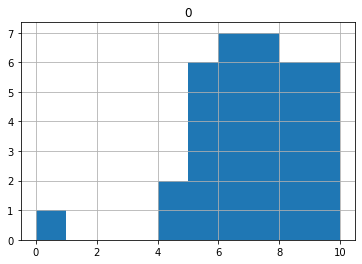

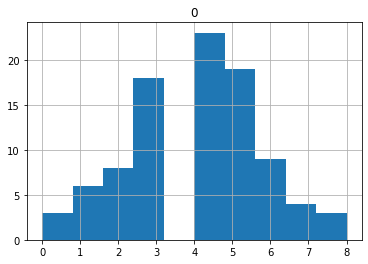

In [43]:
pd.DataFrame(data_1).hist()
pd.DataFrame(data_2).hist()

**Выборки не принадлежат одному множеству**

7. На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

Предположим, Вы сформировали две гипотезы:
Нулевая гипотеза - распределение нормальное, 
Альтернативная гипотеза - распределение не нормальное.


Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03.
Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)

**Так как значение p-value меньше 0.05, то мы не можем подтвердить нулевую гипотезу, а значит принимаем альтернативную гипотезу, что распределение не нормальное**

8. Первая выборка — это пациенты, которых лечили препаратом А. 
Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (уровень значимости принять за 5% или 0.05)

b) При каком минимальном P-values различия были бы уже значимы? 

In [51]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-1.25,size=300)

#Ваш код:
# Подсказка, обратити внимание на Two-sample T-test

total = stats.ttest_ind(A, B, equal_var=False)
total

Ttest_indResult(statistic=0.33196234898293125, pvalue=0.7400341626811637)

In [54]:
if total.pvalue < 0.05:
    print('Различия между препаратами есть')
else:
    print('Различий между препаратами нет')

Различий между препаратами нет


При каком минимальном P-values различия были бы уже значимы? 

**При p-value < 5%**